In [15]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.functional.image import image_gradients

In [16]:
path = "/home/jakobtroidl/Desktop/neural-volumes/data/hemibrain-volume-noisy-large/test_sequence_small/15750_18505_17484/0.png"
img = plt.imread(path)
img = torch.tensor(img, dtype=torch.float32).view(1, 1, 128, 128)

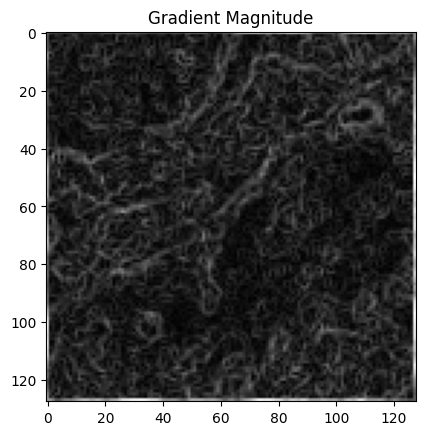

In [17]:
# Define Sobel filters
sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).view(1, 1, 3, 3)
sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).view(1, 1, 3, 3)

# Ensure the filters and the image are on the same device and dtype
sobel_x = sobel_x.to(img.device)
sobel_y = sobel_y.to(img.device)

# Apply filters to the image
grad_x = F.conv2d(img, sobel_x, padding=1)
grad_y = F.conv2d(img, sobel_y, padding=1)

# Compute the gradient magnitude
grad_magnitude = torch.sqrt(grad_x**2 + grad_y**2)

# Display the gradient magnitude for visualization
plt.imshow(grad_magnitude.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Gradient Magnitude')
plt.show()

In [18]:
dy, dx = image_gradients(img)
print("dy shape: ", dy.shape)
print("dx shape: ", dx.shape)
print("dy min max: ", dy.min(), dy.max())
print("dx min max: ", dx.min(), dx.max())

dy shape:  torch.Size([1, 1, 128, 128])
dx shape:  torch.Size([1, 1, 128, 128])
dy min max:  tensor(-0.4196) tensor(0.4078)
dx min max:  tensor(-0.4980) tensor(0.4980)


In [19]:
grad_mag = torch.sqrt(dy**2 + dx**2)

print("grad_mag shape: ", grad_mag.shape)
print("grad_mag min max: ", grad_mag.min(), grad_mag.max())

grad_mag shape:  torch.Size([1, 1, 128, 128])
grad_mag min max:  tensor(0.) tensor(0.5199)


In [20]:
grad_sum = torch.sum(grad_mag)
print("grad_sum: ", grad_sum)

grad_normalized = grad_sum / (128**2)
print("grad_normalized: ", grad_normalized) 

grad_sum:  tensor(1808.4385)
grad_normalized:  tensor(0.1104)


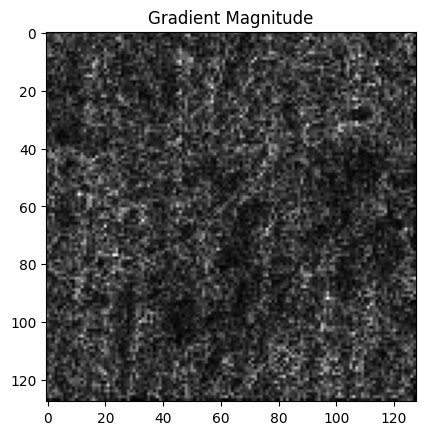

In [21]:
# plot the gradient magnitude for visualization as an image
plt.imshow(grad_mag.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Gradient Magnitude')
plt.show()